#### Building a linear regression model

### Step 1: Importing essential libraries

In [1]:
#Loading packages and libraries required for data analysis
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Reading and Understanding the data

In [2]:
#Reading dataset
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
#Creating new column (Revenue)
df['Revenue'] = df['Price'] * df['Sales']
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,5.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,6.5
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,7.5
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,8.5
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,9.0


In [4]:
# Print desciptive statistics
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
count,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,60.731233,0.826603,40.284932,0.5,25.323288,12.661644
std,16.196266,0.273171,13.178651,0.0,6.893589,3.446795
min,15.100000,0.470000,9.000000,0.5,7.000000,3.500000
25%,49.700000,0.650000,31.000000,0.5,20.000000,10.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000,12.500000
75%,71.300000,0.910000,49.000000,0.5,30.000000,15.000000
max,102.900000,2.500000,80.000000,0.5,43.000000,21.500000


In [5]:
df.describe(include='O')

,Date,Day
count,365,365
unique,365,7
top,1/1/17,Sunday
freq,1,53


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
 7   Revenue      365 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


In [7]:
df.count()

Date           365
Day            365
Temperature    365
Rainfall       365
Flyers         365
Price          365
Sales          365
Revenue        365
dtype: int64

In [8]:
mean_Sales = df['Sales'].mean()
min_Sales = df['Sales'].min()
max_Sales = df['Sales'].max()
print('Mean: ', round(mean_Sales,2))
print('Min: ', min_Sales)
print('Max: ', max_Sales)

Mean:  25.32
Min:  7
Max:  43


### Step 3: Visualizing the data

<AxesSubplot:>

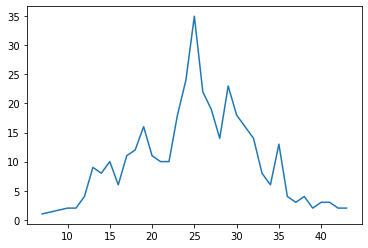

In [9]:
#Plotting Daily Sales

df['Sales'].value_counts().sort_index().plot.line()

<AxesSubplot:xlabel='Flyers', ylabel='Sales'>

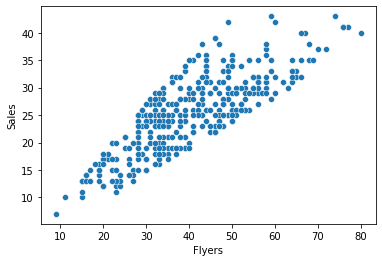

In [10]:
#Plotting ScatterPlot 
import seaborn as sns
sns.scatterplot(x='Flyers', y='Sales',data = df)

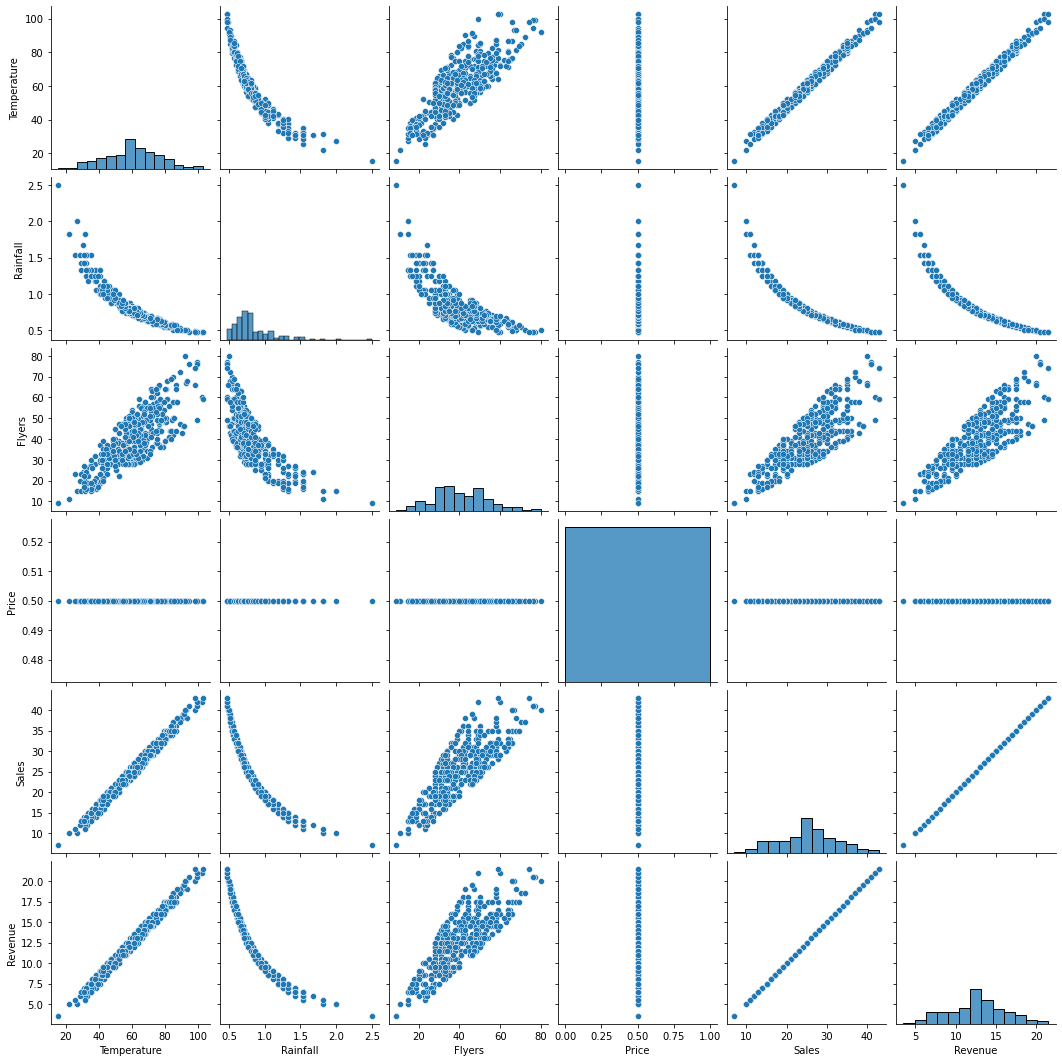

In [11]:
# Data Visualization
sns.pairplot(df)

In [12]:
#Grasping important columns
df_mod = df[['Sales', 'Temperature', 'Rainfall', 'Flyers']]
df_mod.head()

,Sales,Temperature,Rainfall,Flyers
0,10,27.0,2.00,15
1,13,28.9,1.33,15
2,15,34.5,1.33,27
3,17,44.1,1.05,28
4,18,42.4,1.00,33


In [13]:
#Find the correlation between the variables in the dataset.
df_mod.corr()

,Sales,Temperature,Rainfall,Flyers
Sales,1.000000,0.989832,-0.909214,0.805183
Temperature,0.989832,1.000000,-0.902859,0.797719
Rainfall,-0.909214,-0.902859,1.000000,-0.747389
Flyers,0.805183,0.797719,-0.747389,1.000000


<AxesSubplot:>

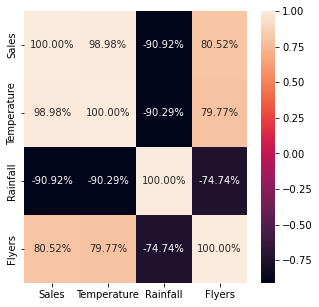

In [14]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(df_mod.corr(),annot = True,fmt='.2%')

#### We see from the above graphs that sales is correlated with temperature, rainfall and flyers

### Performing simple linear regression

sales = a1 * Temperature + a2 * Rainfall + a3 * flyers

We’ll perform linear regression in four steps.

- Create Input(X) and Output(y)
- Create Train and Test set
- Train your model
- Evaluate the model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error         # Evaluating Model
from sklearn.model_selection import train_test_split

In [16]:
X = np.array(df_mod.drop(['Sales'], 1))
y = np.array(df_mod['Sales'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (292, 3)
y_train shape: (292,)
X_test shape: (73, 3)
y_test shape: (73,)


In [18]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.coef_ 
# (a1, a2, a3) Note a2 is negative, i.e. sales inversly proportional to rainfall

array([ 0.38761142, -1.5062294 ,  0.01996797])

In [20]:
lr.intercept_

2.218849173692135

sales = 0.38 * Temperature - 2.12 * Rainfall + 0.02 * flyers + 3.28

### Step 5: Predictions on the test set and Residual analysis

In [21]:
# Predicting y_value using teting data of X
y_pred = lr.predict(X_test)

# Creating residuals from the y_train and y_pred
res = (y_test - y_pred)

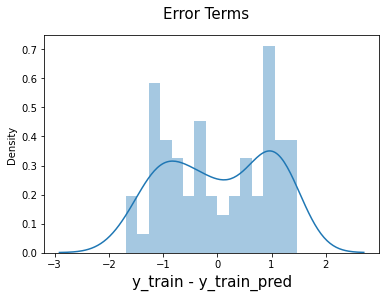

In [22]:
import seaborn as sns
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### Step 6: Evaluating Model

In [23]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared

0.9728424664521818

In [24]:
# Mean square error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred))

Mean squared error: 0.91
Mean Absolute Error: 0.86
